In [2]:
# Import tools
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from arch import arch_model


In [3]:
df = pd.read_csv(r"/Users/songchu/Desktop/data.csv",sep=',')

In [4]:
df.index = df['Date']
print(df.head())
df.head()

              Date  Coal  Copper  Crude Oil WTI  Ethanol  Gasoline RBOB  \
Date                                                                      
3/1/2000  3/1/2000   NaN     NaN            NaN      NaN            NaN   
4/1/2000  4/1/2000   NaN   0.838          25.55      NaN            NaN   
5/1/2000  5/1/2000   NaN   0.848          24.91      NaN            NaN   
6/1/2000  6/1/2000   NaN   0.845          24.78      NaN            NaN   
7/1/2000  7/1/2000   NaN   0.846          24.22      NaN            NaN   

           Gold  Lean Hogs  Live Cattle  Natural Gas  Platinum  Silver  \
Date                                                                     
3/1/2000    NaN      55.98          NaN          NaN       NaN     NaN   
4/1/2000  282.7      55.62          NaN        2.176       NaN     NaN   
5/1/2000  281.1      55.08          NaN        2.168       NaN     NaN   
6/1/2000  281.4      55.17          NaN        2.196       NaN     NaN   
7/1/2000  281.9      55.62    

,Date,Coal,Copper,Crude Oil WTI,Ethanol,Gasoline RBOB,Gold,Lean Hogs,Live Cattle,Natural Gas,Platinum,Silver,US Corn,US Soybean Meal,US Soybean Oil,US Soybeans,US Wheat
Date,,,,,,,,,,,,,,,,,
3/1/2000,3/1/2000,NaN,NaN,NaN,NaN,NaN,NaN,55.98,NaN,NaN,NaN,NaN,NaN,146.4,NaN,NaN,NaN
4/1/2000,4/1/2000,NaN,0.838,25.55,NaN,NaN,282.7,55.62,NaN,2.176,NaN,NaN,NaN,147.9,NaN,NaN,NaN
5/1/2000,5/1/2000,NaN,0.848,24.91,NaN,NaN,281.1,55.08,NaN,2.168,NaN,NaN,NaN,150.7,NaN,NaN,NaN
6/1/2000,6/1/2000,NaN,0.845,24.78,NaN,NaN,281.4,55.17,NaN,2.196,NaN,NaN,NaN,149.1,NaN,NaN,NaN
7/1/2000,7/1/2000,NaN,0.846,24.22,NaN,NaN,281.9,55.62,NaN,2.173,NaN,NaN,NaN,149.1,NaN,NaN,NaN


In [5]:
df = pd.DataFrame(df) 
df = df.fillna(method = 'pad')   #replace nan with the former data
df = df.drop(["Date"],axis=1)

In [6]:
n = ['Coal',
 'Copper',
 'Crude Oil WTI',
 'Ethanol',
 'Gasoline RBOB',
 'Gold',
 'Lean Hogs',
 'Live Cattle',
 'Natural Gas',
 'Platinum',
 'Silver',
 'US Corn',
 'US Soybean Meal',
 'US Soybean Oil',
 'US Soybeans',
 'US Wheat']

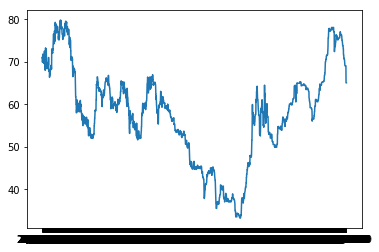

None


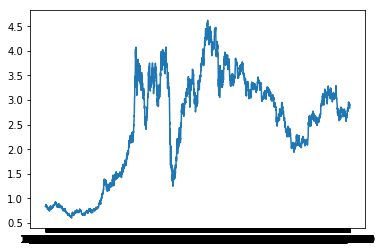

None


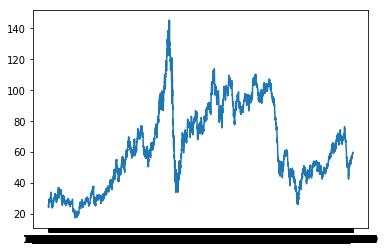

None


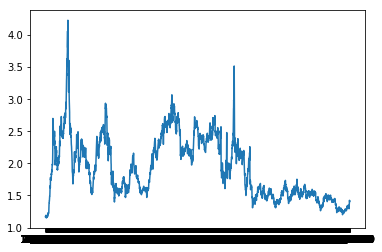

None


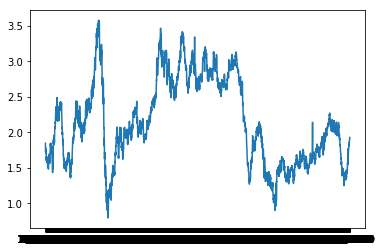

None


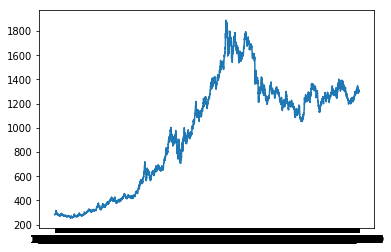

None


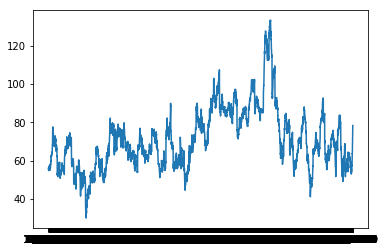

None


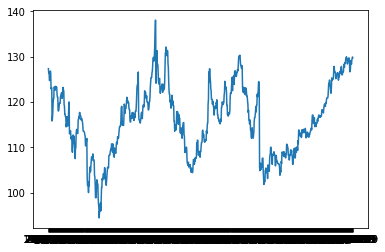

None


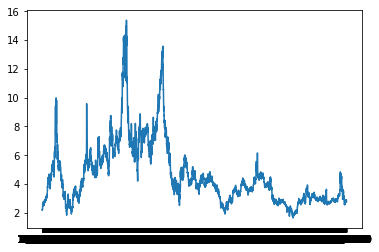

None


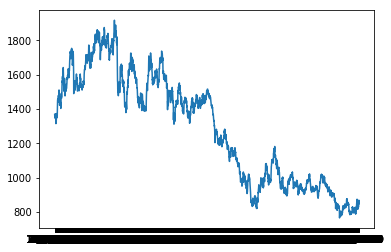

None


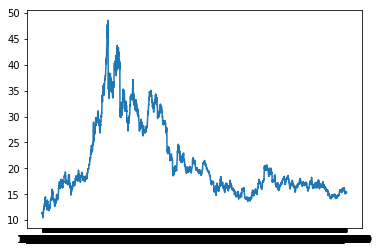

None


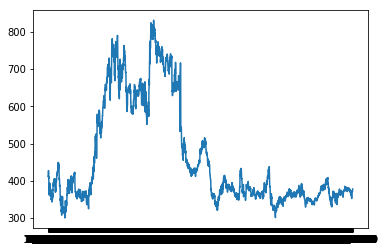

None


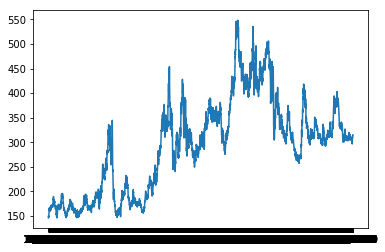

None


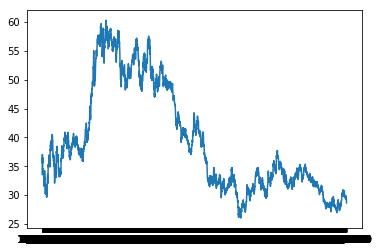

None


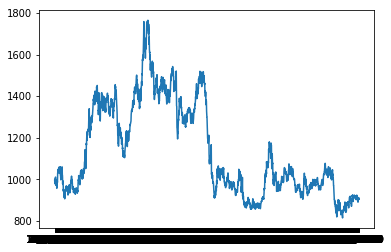

None


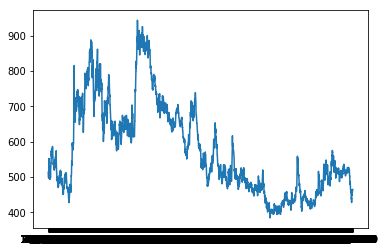

None


In [8]:
for i in range(16):
    TS = df[[n[i]]]
    TS = TS[np.isnan(df[n[i]]) == False]
    plt.plot(TS)
    print (plt.show())

In [10]:
# Autocorrelation Test
for i in range(16):
    TS = df[[n[i]]]
    TS = TS[np.isnan(df[n[i]]) == False]
    [lbvalue, pvalue] = acorr_ljungbox(TS, lags = 12)
    print('Ljung-Box Statistics: ', lbvalue[9])
    print('p-value: ', pvalue[9])

Ljung-Box Statistics:  24650.858618208906
p-value:  0.0
Ljung-Box Statistics:  53556.76121316701
p-value:  0.0
Ljung-Box Statistics:  53339.68145501508
p-value:  0.0
Ljung-Box Statistics:  38611.57933785375
p-value:  0.0
Ljung-Box Statistics:  38554.935156830215
p-value:  0.0
Ljung-Box Statistics:  53823.38683663913
p-value:  0.0
Ljung-Box Statistics:  51397.002053499156
p-value:  0.0
Ljung-Box Statistics:  7318.9698232535175
p-value:  0.0
Ljung-Box Statistics:  52158.95727345272
p-value:  0.0
Ljung-Box Statistics:  29008.736531731513
p-value:  0.0
Ljung-Box Statistics:  30656.924241166384
p-value:  0.0
Ljung-Box Statistics:  30778.102988892166
p-value:  0.0
Ljung-Box Statistics:  52930.3855517817
p-value:  0.0
Ljung-Box Statistics:  30918.067181622646
p-value:  0.0
Ljung-Box Statistics:  28745.03887306589
p-value:  0.0
Ljung-Box Statistics:  28374.796436223685
p-value:  0.0


In [11]:
# ARCH Test
for i in range(16):
    TS = df[[n[i]]]
    TS = TS[np.isnan(df[n[i]]) == False]
    [lbvalue, pvalue] = acorr_ljungbox(TS**2, lags = 12)
    print('Ljung-Box Statistics: ', lbvalue[9])
    print('p-value: ', pvalue[9])

Ljung-Box Statistics:  24593.776831214003
p-value:  0.0
Ljung-Box Statistics:  53199.79326915769
p-value:  0.0
Ljung-Box Statistics:  53094.22891451378
p-value:  0.0
Ljung-Box Statistics:  37879.470471208624
p-value:  0.0
Ljung-Box Statistics:  38454.20783289386
p-value:  0.0
Ljung-Box Statistics:  53710.68559177194
p-value:  0.0
Ljung-Box Statistics:  51588.471465211594
p-value:  0.0
Ljung-Box Statistics:  7270.4318348003835
p-value:  0.0
Ljung-Box Statistics:  51193.60465412349
p-value:  0.0
Ljung-Box Statistics:  28921.89842190837
p-value:  0.0
Ljung-Box Statistics:  30334.25522778439
p-value:  0.0
Ljung-Box Statistics:  30632.707035717704
p-value:  0.0
Ljung-Box Statistics:  52535.2908275876
p-value:  0.0
Ljung-Box Statistics:  30888.82563094997
p-value:  0.0
Ljung-Box Statistics:  28674.630218500748
p-value:  0.0
Ljung-Box Statistics:  28261.645091230053
p-value:  0.0


In [12]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) 
    d_rng = range(5) 
    for i in pq_rng:
        for d in d_rng:
                try:
                    tmp_mdl = arch_model(y=TS, p=i, q=d, dist='Normal').fit()
                    tmp_aic = tmp_mdl.aic   #大样本时一般优先考虑AIC
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [13]:
for i in range(16):
    TS = df[[n[i]]]
    TS = TS[np.isnan(df[n[i]]) == False]
    res= _get_best_model(TS)
    print (res)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 9134.185626460876
Iteration:      2,   Func. Count:     12,   Neg. LLF: 8984.787039150306
Iteration:      3,   Func. Count:     18,   Neg. LLF: 8863.180931931643
Iteration:      4,   Func. Count:     24,   Neg. LLF: 8779.862735150497
Iteration:      5,   Func. Count:     30,   Neg. LLF: 8735.89802863629
Iteration:      6,   Func. Count:     36,   Neg. LLF: 8696.328298222925
Iteration:      7,   Func. Count:     42,   Neg. LLF: 8660.229288228062
Iteration:      8,   Func. Count:     48,   Neg. LLF: 8627.397698259305
Iteration:      9,   Func. Count:     54,   Neg. LLF: 8597.618060425966
Iteration:     10,   Func. Count:     60,   Neg. LLF: 8570.730100703222
Iteration:     11,   Func. Count:     66,   Neg. LLF: 8546.723727761528
Iteration:     12,   Func. Count:     72,   Neg. LLF: 8523.866176808873
Iteration:     13,   Func. Count:     79,   Neg. LLF: 8514.54407533561
Iteration:     14,   Func. Count:     85,   Neg. LLF: 8494.5810447

Iteration:      4,   Func. Count:     37,   Neg. LLF: 8253.919645574599
Iteration:      5,   Func. Count:     46,   Neg. LLF: 8197.881476657956
Iteration:      6,   Func. Count:     55,   Neg. LLF: 8125.733407341857
Iteration:      7,   Func. Count:     64,   Neg. LLF: 8057.147205379915
Iteration:      8,   Func. Count:     73,   Neg. LLF: 8041.648970480449
Iteration:      9,   Func. Count:     82,   Neg. LLF: 8013.345704295716
Iteration:     10,   Func. Count:     91,   Neg. LLF: 8002.307421827389
Iteration:     11,   Func. Count:    100,   Neg. LLF: 7988.693520744907
Iteration:     12,   Func. Count:    109,   Neg. LLF: 7980.90345310934
Iteration:     13,   Func. Count:    118,   Neg. LLF: 7974.21245191014
Iteration:     14,   Func. Count:    127,   Neg. LLF: 7969.053935082348
Iteration:     15,   Func. Count:    136,   Neg. LLF: 7959.620674636486
Iteration:     16,   Func. Count:    145,   Neg. LLF: 7958.256873304963
Iteration:     17,   Func. Count:    154,   Neg. LLF: 7954.7776958

Iteration:      1,   Func. Count:      9,   Neg. LLF: 8465.575717617374
Iteration:      2,   Func. Count:     20,   Neg. LLF: 8382.106025799996
Iteration:      3,   Func. Count:     30,   Neg. LLF: 8288.560855520955
Iteration:      4,   Func. Count:     41,   Neg. LLF: 8275.758667535414
Iteration:      5,   Func. Count:     51,   Neg. LLF: 8214.345841736718
Iteration:      6,   Func. Count:     61,   Neg. LLF: 8125.931890114186
Iteration:      7,   Func. Count:     71,   Neg. LLF: 8066.860818015181
Iteration:      8,   Func. Count:     81,   Neg. LLF: 8050.992907662625
Iteration:      9,   Func. Count:     91,   Neg. LLF: 8035.732355697226
Iteration:     10,   Func. Count:    101,   Neg. LLF: 8021.50791157949
Iteration:     11,   Func. Count:    111,   Neg. LLF: 8006.773030394856
Iteration:     12,   Func. Count:    121,   Neg. LLF: 7995.218552914822
Iteration:     13,   Func. Count:    131,   Neg. LLF: 7984.5020194250155
Iteration:     14,   Func. Count:    141,   Neg. LLF: 7977.42439

Iteration:     21,   Func. Count:    230,   Neg. LLF: 7953.058609430823
Iteration:     22,   Func. Count:    240,   Neg. LLF: 7953.058009467059
Iteration:     23,   Func. Count:    250,   Neg. LLF: 7953.057971173905
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7953.05797125279
            Iterations: 23
            Function evaluations: 250
            Gradient evaluations: 23
Iteration:      1,   Func. Count:     11,   Neg. LLF: 8486.43288432105
Iteration:      2,   Func. Count:     24,   Neg. LLF: 8401.853757252542
Iteration:      3,   Func. Count:     36,   Neg. LLF: 8235.472368967803
Iteration:      4,   Func. Count:     49,   Neg. LLF: 8228.695281567492
Iteration:      5,   Func. Count:     61,   Neg. LLF: 8180.577149902195
Iteration:      6,   Func. Count:     73,   Neg. LLF: 8099.375708936235
Iteration:      7,   Func. Count:     85,   Neg. LLF: 8079.672354778464
Iteration:      8,   Func. Count:     97,   Neg. LLF: 8061.185353577677

Iteration:     22,   Func. Count:    263,   Neg. LLF: 7953.06424174102
Iteration:     23,   Func. Count:    274,   Neg. LLF: 7953.060014733373
Iteration:     24,   Func. Count:    285,   Neg. LLF: 7953.058238228752
Iteration:     25,   Func. Count:    296,   Neg. LLF: 7953.057973272103
Iteration:     26,   Func. Count:    307,   Neg. LLF: 7953.057970792968
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7953.057970871949
            Iterations: 26
            Function evaluations: 307
            Gradient evaluations: 26
Iteration:      1,   Func. Count:     12,   Neg. LLF: 8491.515781814478
Iteration:      2,   Func. Count:     26,   Neg. LLF: 8408.177872849341
Iteration:      3,   Func. Count:     39,   Neg. LLF: 8310.401622032061
Iteration:      4,   Func. Count:     53,   Neg. LLF: 8298.387514578422
Iteration:      5,   Func. Count:     66,   Neg. LLF: 8233.981374948791
Iteration:      6,   Func. Count:     79,   Neg. LLF: 8200.23329265301

/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


Iteration:      4,   Func. Count:     38,   Neg. LLF: 5370.718473795435
Iteration:      5,   Func. Count:     46,   Neg. LLF: 5159.339409716414
Iteration:      6,   Func. Count:     53,   Neg. LLF: 5047.733182817566
Iteration:      7,   Func. Count:     61,   Neg. LLF: 4892.78935007186
Iteration:      8,   Func. Count:     69,   Neg. LLF: 4764.487873554746
Iteration:      9,   Func. Count:     76,   Neg. LLF: 4692.900354340763
Iteration:     10,   Func. Count:     83,   Neg. LLF: 4554.460735853827
Iteration:     11,   Func. Count:     92,   Neg. LLF: 4550.105599838557
Iteration:     12,   Func. Count:    100,   Neg. LLF: 4549.25199133678
Iteration:     13,   Func. Count:    108,   Neg. LLF: 4548.923365878894
Iteration:     14,   Func. Count:    115,   Neg. LLF: 4548.761200187519
Iteration:     15,   Func. Count:    122,   Neg. LLF: 4548.60885911232
Iteration:     16,   Func. Count:    129,   Neg. LLF: 4548.608724492075
Iteration:     17,   Func. Count:    136,   Neg. LLF: 4548.60872315

Iteration:     29,   Func. Count:    290,   Neg. LLF: 4547.4288398780445
Iteration:     30,   Func. Count:    299,   Neg. LLF: 4547.428833872724
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4547.428833872731
            Iterations: 30
            Function evaluations: 299
            Gradient evaluations: 30
Iteration:      1,   Func. Count:     10,   Neg. LLF: 6352.933855773961
Iteration:      2,   Func. Count:     27,   Neg. LLF: 5710.935587627787
Iteration:      3,   Func. Count:     38,   Neg. LLF: 5519.080766524725
Iteration:      4,   Func. Count:     50,   Neg. LLF: 5410.016403066258
Iteration:      5,   Func. Count:     61,   Neg. LLF: 5112.924967867254
Iteration:      6,   Func. Count:     72,   Neg. LLF: 4976.09097224287
Iteration:      7,   Func. Count:     91,   Neg. LLF: 4853.535501951181
Iteration:      8,   Func. Count:    101,   Neg. LLF: 4618.476537614663
Iteration:      9,   Func. Count:    112,   Neg. LLF: 4602.1744159825

/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


Iteration:      2,   Func. Count:     23,   Neg. LLF: 5668.947518948264
Iteration:      3,   Func. Count:     32,   Neg. LLF: 5488.721403906478
Iteration:      4,   Func. Count:     42,   Neg. LLF: 5372.976263411894
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5086.17394938309
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4820.351731269041
Iteration:      7,   Func. Count:     69,   Neg. LLF: 4724.955029205108
Iteration:      8,   Func. Count:     77,   Neg. LLF: 4646.82487536779
Iteration:      9,   Func. Count:     86,   Neg. LLF: 4628.676964536713
Iteration:     10,   Func. Count:     95,   Neg. LLF: 4612.224950932623
Iteration:     11,   Func. Count:    104,   Neg. LLF: 4571.454640388265
Iteration:     12,   Func. Count:    113,   Neg. LLF: 4564.609697783719
Iteration:     13,   Func. Count:    122,   Neg. LLF: 4560.776429941942
Iteration:     14,   Func. Count:    131,   Neg. LLF: 4555.73242495079
Iteration:     15,   Func. Count:    139,   Neg. LLF: 4550.86165051

Iteration:     18,   Func. Count:    201,   Neg. LLF: 4551.737142793144
Iteration:     19,   Func. Count:    211,   Neg. LLF: 4551.219009462632
Iteration:     20,   Func. Count:    222,   Neg. LLF: 4548.823298671866
Iteration:     21,   Func. Count:    233,   Neg. LLF: 4548.548911979057
Iteration:     22,   Func. Count:    243,   Neg. LLF: 4548.20105999813
Iteration:     23,   Func. Count:    253,   Neg. LLF: 4547.997596858671
Iteration:     24,   Func. Count:    263,   Neg. LLF: 4547.97261195192
Iteration:     25,   Func. Count:    273,   Neg. LLF: 4547.964526715231
Iteration:     26,   Func. Count:    283,   Neg. LLF: 4547.962937144928
Iteration:     27,   Func. Count:    293,   Neg. LLF: 4547.962882069545
Iteration:     28,   Func. Count:    303,   Neg. LLF: 4547.9628521945815
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4547.962851582972
            Iterations: 28
            Function evaluations: 304
            Gradient evaluations: 2

Iteration:      8,   Func. Count:     74,   Neg. LLF: 22729.005493891054
Iteration:      9,   Func. Count:     85,   Neg. LLF: 22728.57007208593
Iteration:     10,   Func. Count:     93,   Neg. LLF: 22712.292164342856
Iteration:     11,   Func. Count:    101,   Neg. LLF: 22709.38134471677
Iteration:     12,   Func. Count:    109,   Neg. LLF: 22708.943860182404
Iteration:     13,   Func. Count:    117,   Neg. LLF: 22707.377030685384
Iteration:     14,   Func. Count:    126,   Neg. LLF: 22707.22272358663
Iteration:     15,   Func. Count:    135,   Neg. LLF: 22706.47269131823
Iteration:     16,   Func. Count:    143,   Neg. LLF: 22705.959157895693
Iteration:     17,   Func. Count:    151,   Neg. LLF: 22704.4713066552
Iteration:     18,   Func. Count:    159,   Neg. LLF: 22703.330855869142
Iteration:     19,   Func. Count:    167,   Neg. LLF: 22703.160597065737
Iteration:     20,   Func. Count:    175,   Neg. LLF: 22703.1179850901
Iteration:     21,   Func. Count:    183,   Neg. LLF: 22703

Iteration:      1,   Func. Count:      9,   Neg. LLF: 23621.618938884923
Iteration:      2,   Func. Count:     19,   Neg. LLF: 23513.629267423275
Iteration:      3,   Func. Count:     30,   Neg. LLF: 23326.966698201977
Iteration:      4,   Func. Count:     40,   Neg. LLF: 23218.133075565318
Iteration:      5,   Func. Count:     50,   Neg. LLF: 23138.963382744725
Iteration:      6,   Func. Count:     60,   Neg. LLF: 23041.502245144926
Iteration:      7,   Func. Count:     69,   Neg. LLF: 23004.986287632677
Iteration:      8,   Func. Count:     83,   Neg. LLF: 22772.903166793287
Iteration:      9,   Func. Count:     92,   Neg. LLF: 22746.634091260246
Iteration:     10,   Func. Count:    102,   Neg. LLF: 22742.408848962965
Iteration:     11,   Func. Count:    112,   Neg. LLF: 22730.42735155097
Iteration:     12,   Func. Count:    123,   Neg. LLF: 22726.009057782296
Iteration:     13,   Func. Count:    133,   Neg. LLF: 22723.451859531124
Iteration:     14,   Func. Count:    142,   Neg. LLF

Iteration:      1,   Func. Count:      9,   Neg. LLF: 23609.997683883867
Iteration:      2,   Func. Count:     19,   Neg. LLF: 23508.42066817668
Iteration:      3,   Func. Count:     30,   Neg. LLF: 23321.74108203854
Iteration:      4,   Func. Count:     40,   Neg. LLF: 23212.279804051665
Iteration:      5,   Func. Count:     50,   Neg. LLF: 23173.319528976892
Iteration:      6,   Func. Count:     60,   Neg. LLF: 23026.931161991517
Iteration:      7,   Func. Count:     70,   Neg. LLF: 22848.5435610376
Iteration:      8,   Func. Count:     80,   Neg. LLF: 22794.707790141576
Iteration:      9,   Func. Count:     90,   Neg. LLF: 22747.753744178437
Iteration:     10,   Func. Count:    100,   Neg. LLF: 22738.82018650812
Iteration:     11,   Func. Count:    110,   Neg. LLF: 22730.24855545565
Iteration:     12,   Func. Count:    120,   Neg. LLF: 22726.84176062482
Iteration:     13,   Func. Count:    129,   Neg. LLF: 22715.704982929023
Iteration:     14,   Func. Count:    139,   Neg. LLF: 2271

Iteration:      1,   Func. Count:      9,   Neg. LLF: 23597.09944899416
Iteration:      2,   Func. Count:     19,   Neg. LLF: 23502.88434317828
Iteration:      3,   Func. Count:     30,   Neg. LLF: 23316.286902594482
Iteration:      4,   Func. Count:     40,   Neg. LLF: 23206.414811725204
Iteration:      5,   Func. Count:     50,   Neg. LLF: 23167.03770286852
Iteration:      6,   Func. Count:     60,   Neg. LLF: 23076.458270509214
Iteration:      7,   Func. Count:     70,   Neg. LLF: 22885.00641027998
Iteration:      8,   Func. Count:     80,   Neg. LLF: 22779.517978759
Iteration:      9,   Func. Count:     90,   Neg. LLF: 22757.17447076866
Iteration:     10,   Func. Count:    100,   Neg. LLF: 22736.567866297955
Iteration:     11,   Func. Count:    110,   Neg. LLF: 22730.570653845047
Iteration:     12,   Func. Count:    119,   Neg. LLF: 22717.222453959912
Iteration:     13,   Func. Count:    129,   Neg. LLF: 22714.678511794868
Iteration:     14,   Func. Count:    140,   Neg. LLF: 22714

Iteration:     31,   Func. Count:    391,   Neg. LLF: 22702.96790959882
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 22702.96790959887
            Iterations: 31
            Function evaluations: 391
            Gradient evaluations: 31
aic: 45413.99056 | order: (2, 0)
(45413.99056428128, (2, 0),                       Constant Mean - ARCH Model Results                      
Dep. Variable:          Crude Oil WTI   R-squared:                      -0.201
Mean Model:             Constant Mean   Adj. R-squared:                 -0.201
Vol Model:                       ARCH   Log-Likelihood:               -22703.0
Distribution:                  Normal   AIC:                           45414.0
Method:            Maximum Likelihood   BIC:                           45440.4
                                        No. Observations:                 5406
Date:                Wed, May 01 2019   Df Residuals:                     5402
Time:                   

/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarn

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1677.8382679315757
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1398.8888671775599
Iteration:      3,   Func. Count:     35,   Neg. LLF: 1122.568168738835
Iteration:      4,   Func. Count:     48,   Neg. LLF: 1115.027109144136
Iteration:      5,   Func. Count:     56,   Neg. LLF: 1028.127134205144
Iteration:      6,   Func. Count:     65,   Neg. LLF: 900.4502156261331
Iteration:      7,   Func. Count:     82,   Neg. LLF: 977.85078991127
Iteration:      8,   Func. Count:     99,   Neg. LLF: 834.5599887805465
Iteration:      9,   Func. Count:    108,   Neg. LLF: 816.1749863755832
Iteration:     10,   Func. Count:    122,   Neg. LLF: 813.3208804188603
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 813.3208687830933
            Iterations: 14
            Function evaluations: 122
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      8,   Neg. LLF: 1714.4

/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Conv

Iteration:      2,   Func. Count:     21,   Neg. LLF: 2201.664047646273
Iteration:      3,   Func. Count:     29,   Neg. LLF: 1657.1099395991155
Iteration:      4,   Func. Count:     37,   Neg. LLF: 1592.7339479802686
Iteration:      5,   Func. Count:     50,   Neg. LLF: 1574.683901936061
Iteration:      6,   Func. Count:     57,   Neg. LLF: 748.9591643643878
Iteration:      7,   Func. Count:     71,   Neg. LLF: 729.2306614775746
Iteration:      8,   Func. Count:     82,   Neg. LLF: 167.74632144065288
Iteration:      9,   Func. Count:     91,   Neg. LLF: 166.1035374505061
Iteration:     10,   Func. Count:    100,   Neg. LLF: 154.82208766975975
Iteration:     11,   Func. Count:    107,   Neg. LLF: 154.21893483935332
Iteration:     12,   Func. Count:    116,   Neg. LLF: 154.19418209529124
Iteration:     13,   Func. Count:    124,   Neg. LLF: 154.17923071171015
Iteration:     14,   Func. Count:    132,   Neg. LLF: 154.03278974984119
Iteration:     15,   Func. Count:    140,   Neg. LLF: 15

/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Conv

Iteration:      4,   Func. Count:     63,   Neg. LLF: 1166.870632369707
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 1166.870585248753
            Iterations: 8
            Function evaluations: 63
            Gradient evaluations: 4
Iteration:      1,   Func. Count:     11,   Neg. LLF: 1779.9390810512823
Iteration:      2,   Func. Count:     27,   Neg. LLF: 1440.0799846722728
Iteration:      3,   Func. Count:     48,   Neg. LLF: 1231.1898958330619
Iteration:      4,   Func. Count:     66,   Neg. LLF: 1195.065699652273
Iteration:      5,   Func. Count:     82,   Neg. LLF: 1194.627407685311
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 1194.6273580645682
            Iterations: 9
            Function evaluations: 82
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      8,   Neg. LLF: 2259.4424409855037
Iteration:      2,   Func. Count:     23,   Neg. LLF: 220

/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  Conv

Iteration:      1,   Func. Count:     10,   Neg. LLF: 1728.4180158339705
Iteration:      2,   Func. Count:     25,   Neg. LLF: 1415.3055013018675
Iteration:      3,   Func. Count:     44,   Neg. LLF: 1176.0072881939186
Iteration:      4,   Func. Count:     63,   Neg. LLF: 1149.644841577373
Iteration:      5,   Func. Count:     78,   Neg. LLF: 1149.382028238207
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 1149.3819841937998
            Iterations: 9
            Function evaluations: 78
            Gradient evaluations: 5
Iteration:      1,   Func. Count:     11,   Neg. LLF: 1763.440634241916
Iteration:      2,   Func. Count:     27,   Neg. LLF: 1450.9270704912217
Iteration:      3,   Func. Count:     47,   Neg. LLF: 1202.314736287161
Iteration:      4,   Func. Count:     67,   Neg. LLF: 1177.716326822316
Iteration:      5,   Func. Count:     83,   Neg. LLF: 1177.565728107288
Positive directional derivative for linesearch    (Exit mo

Iteration:      8,   Func. Count:     79,   Neg. LLF: 1785.4358605885304
Iteration:      9,   Func. Count:     88,   Neg. LLF: 1755.2959610751786
Iteration:     10,   Func. Count:    102,   Neg. LLF: 1749.2264581714146
Iteration:     11,   Func. Count:    110,   Neg. LLF: 1691.555193875714
Iteration:     12,   Func. Count:    122,   Neg. LLF: 1691.5543954482214
Iteration:     13,   Func. Count:    131,   Neg. LLF: 1689.4212049188855
Iteration:     14,   Func. Count:    140,   Neg. LLF: 1685.0015991850719
Iteration:     15,   Func. Count:    149,   Neg. LLF: 1674.2329188839415
Iteration:     16,   Func. Count:    158,   Neg. LLF: 1671.9955975043401
Iteration:     17,   Func. Count:    167,   Neg. LLF: 1671.5585452093885
Iteration:     18,   Func. Count:    176,   Neg. LLF: 1671.2992581823025
Iteration:     19,   Func. Count:    185,   Neg. LLF: 1671.1137198729484
Iteration:     20,   Func. Count:    194,   Neg. LLF: 1671.0566345489478
Iteration:     21,   Func. Count:    203,   Neg. LLF

Iteration:      3,   Func. Count:     38,   Neg. LLF: 2277.973429378644
Iteration:      4,   Func. Count:     51,   Neg. LLF: 2248.057510028324
Iteration:      5,   Func. Count:     61,   Neg. LLF: 1944.8401432124651
Iteration:      6,   Func. Count:     72,   Neg. LLF: 1921.018590199284
Iteration:      7,   Func. Count:     89,   Neg. LLF: 1894.6728185305078
Iteration:      8,   Func. Count:     99,   Neg. LLF: 1690.8436795853024
Iteration:      9,   Func. Count:    110,   Neg. LLF: 1686.480760481541
Iteration:     10,   Func. Count:    121,   Neg. LLF: 1681.79945942306
Iteration:     11,   Func. Count:    132,   Neg. LLF: 1678.7955331648132
Iteration:     12,   Func. Count:    143,   Neg. LLF: 1675.3175871898404
Iteration:     13,   Func. Count:    156,   Neg. LLF: 1675.1341417373499
Iteration:     14,   Func. Count:    167,   Neg. LLF: 1673.5559140166176
Iteration:     15,   Func. Count:    178,   Neg. LLF: 1671.2128628130793
Iteration:     16,   Func. Count:    188,   Neg. LLF: 166

Iteration:     33,   Func. Count:    375,   Neg. LLF: 1670.9876345211135
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1670.9876345211455
            Iterations: 37
            Function evaluations: 375
            Gradient evaluations: 33
Iteration:      1,   Func. Count:     11,   Neg. LLF: 2438.884857355789
Iteration:      2,   Func. Count:     29,   Neg. LLF: 2312.742715341779
Iteration:      3,   Func. Count:     41,   Neg. LLF: 2280.328389451932
Iteration:      4,   Func. Count:     55,   Neg. LLF: 2250.59348391833
Iteration:      5,   Func. Count:     67,   Neg. LLF: 1926.4125686752589
Iteration:      6,   Func. Count:     79,   Neg. LLF: 1886.3265714596205
Iteration:      7,   Func. Count:     91,   Neg. LLF: 1812.1714274025896
Iteration:      8,   Func. Count:    103,   Neg. LLF: 1768.220623924491
Iteration:      9,   Func. Count:    115,   Neg. LLF: 1707.0751642634957
Iteration:     10,   Func. Count:    127,   Neg. LLF: 1702.18147

/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


Iteration:      1,   Func. Count:     12,   Neg. LLF: 2447.8663221086335
Iteration:      2,   Func. Count:     31,   Neg. LLF: 2321.748140685177
Iteration:      3,   Func. Count:     45,   Neg. LLF: 2275.5035201201144
Iteration:      4,   Func. Count:     60,   Neg. LLF: 2245.8363208581877
Iteration:      5,   Func. Count:     73,   Neg. LLF: 1934.2175341646364
Iteration:      6,   Func. Count:     86,   Neg. LLF: 1800.5651534856488
Iteration:      7,   Func. Count:     99,   Neg. LLF: 1778.2442163444339
Iteration:      8,   Func. Count:    112,   Neg. LLF: 1725.2338990981984
Iteration:      9,   Func. Count:    125,   Neg. LLF: 1720.4357570652587
Iteration:     10,   Func. Count:    138,   Neg. LLF: 1710.3316152557436
Iteration:     11,   Func. Count:    151,   Neg. LLF: 1702.7458916569115
Iteration:     12,   Func. Count:    164,   Neg. LLF: 1693.7964551561513
Iteration:     13,   Func. Count:    177,   Neg. LLF: 1682.9081861890575
Iteration:     14,   Func. Count:    190,   Neg. LLF

Iteration:     10,   Func. Count:     72,   Neg. LLF: 37444.771434765134
Iteration:     11,   Func. Count:     79,   Neg. LLF: 37443.59489638351
Iteration:     12,   Func. Count:     86,   Neg. LLF: 37443.39998651574
Iteration:     13,   Func. Count:     93,   Neg. LLF: 37443.38727396479
Iteration:     14,   Func. Count:    100,   Neg. LLF: 37443.35100079871
Iteration:     15,   Func. Count:    107,   Neg. LLF: 37443.236410049285
Iteration:     16,   Func. Count:    114,   Neg. LLF: 37442.9625679419
Iteration:     17,   Func. Count:    121,   Neg. LLF: 37442.23911785621
Iteration:     18,   Func. Count:    128,   Neg. LLF: 37440.254022194815
Iteration:     19,   Func. Count:    135,   Neg. LLF: 37435.37487407545
Iteration:     20,   Func. Count:    142,   Neg. LLF: 37421.28841995646
Iteration:     21,   Func. Count:    149,   Neg. LLF: 37388.51995404629
Iteration:     22,   Func. Count:    156,   Neg. LLF: 37152.026014643125
Iteration:     23,   Func. Count:    164,   Neg. LLF: 37137.0

Iteration:      1,   Func. Count:      7,   Neg. LLF: 39515.79544747081
Iteration:      2,   Func. Count:     16,   Neg. LLF: 39496.167910850156
Iteration:      3,   Func. Count:     23,   Neg. LLF: 39009.70988519362
Iteration:      4,   Func. Count:     31,   Neg. LLF: 37678.737375276294
Iteration:      5,   Func. Count:     41,   Neg. LLF: 37456.30293263001
Iteration:      6,   Func. Count:     48,   Neg. LLF: 37453.19913885165
Iteration:      7,   Func. Count:     55,   Neg. LLF: 37451.836276758586
Iteration:      8,   Func. Count:     62,   Neg. LLF: 37446.51102228339
Iteration:      9,   Func. Count:     69,   Neg. LLF: 37443.619824040965
Iteration:     10,   Func. Count:     76,   Neg. LLF: 37443.4884972132
Iteration:     11,   Func. Count:     83,   Neg. LLF: 37443.47606371238
Iteration:     12,   Func. Count:     90,   Neg. LLF: 37443.40073922844
Iteration:     13,   Func. Count:     97,   Neg. LLF: 37442.99331551607
Iteration:     14,   Func. Count:    104,   Neg. LLF: 37440.9

Iteration:      7,   Func. Count:     76,   Neg. LLF: 37449.58710253053
Iteration:      8,   Func. Count:     86,   Neg. LLF: 37445.84182752037
Iteration:      9,   Func. Count:     96,   Neg. LLF: 37444.102924181236
Iteration:     10,   Func. Count:    106,   Neg. LLF: 37443.47089784795
Iteration:     11,   Func. Count:    116,   Neg. LLF: 37443.40300951476
Iteration:     12,   Func. Count:    126,   Neg. LLF: 37443.38830704593
Iteration:     13,   Func. Count:    136,   Neg. LLF: 37443.30332382093
Iteration:     14,   Func. Count:    146,   Neg. LLF: 37443.15278339585
Iteration:     15,   Func. Count:    156,   Neg. LLF: 37442.59237567945
Iteration:     16,   Func. Count:    166,   Neg. LLF: 37441.20640027615
Iteration:     17,   Func. Count:    176,   Neg. LLF: 37437.80756056489
Iteration:     18,   Func. Count:    186,   Neg. LLF: 37428.55383646504
Iteration:     19,   Func. Count:    196,   Neg. LLF: 37402.89339518122
Iteration:     20,   Func. Count:    206,   Neg. LLF: 37322.248

Iteration:     27,   Func. Count:    253,   Neg. LLF: 36762.19909100719
Iteration:     28,   Func. Count:    263,   Neg. LLF: 36754.398869938515
Iteration:     29,   Func. Count:    273,   Neg. LLF: 36739.19938434856
Iteration:     30,   Func. Count:    283,   Neg. LLF: 36737.41221042264
Iteration:     31,   Func. Count:    293,   Neg. LLF: 36734.15524666701
Iteration:     32,   Func. Count:    302,   Neg. LLF: 36728.96351335439
Iteration:     33,   Func. Count:    311,   Neg. LLF: 36727.215065409895
Iteration:     34,   Func. Count:    321,   Neg. LLF: 36726.34106576017
Iteration:     35,   Func. Count:    330,   Neg. LLF: 36725.826871670324
Iteration:     36,   Func. Count:    339,   Neg. LLF: 36724.85397873353
Iteration:     37,   Func. Count:    349,   Neg. LLF: 36724.59343568767
Iteration:     38,   Func. Count:    358,   Neg. LLF: 36724.294687263355
Iteration:     39,   Func. Count:    367,   Neg. LLF: 36724.21882016294
Iteration:     40,   Func. Count:    376,   Neg. LLF: 36724.

Iteration:     49,   Func. Count:    565,   Neg. LLF: 36732.14360774074
Iteration:     50,   Func. Count:    577,   Neg. LLF: 36725.30490032626
Iteration:     51,   Func. Count:    589,   Neg. LLF: 36724.22627480813
Iteration:     52,   Func. Count:    600,   Neg. LLF: 36722.279130271476
Iteration:     53,   Func. Count:    612,   Neg. LLF: 36722.03852448995
Iteration:     54,   Func. Count:    623,   Neg. LLF: 36722.00545327262
Iteration:     55,   Func. Count:    635,   Neg. LLF: 36722.000243175724
Iteration:     56,   Func. Count:    646,   Neg. LLF: 36721.99888063149
Iteration:     57,   Func. Count:    657,   Neg. LLF: 36721.99874553469
Iteration:     58,   Func. Count:    669,   Neg. LLF: 36721.99857087862
Iteration:     59,   Func. Count:    680,   Neg. LLF: 36721.99844664254
Iteration:     60,   Func. Count:    692,   Neg. LLF: 36721.99843288455
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 36721.998432787055
            Iterations: 

Iteration:     26,   Func. Count:    269,   Neg. LLF: 36888.48343726817
Iteration:     27,   Func. Count:    280,   Neg. LLF: 36812.127708057116
Iteration:     28,   Func. Count:    291,   Neg. LLF: 36790.324115263866
Iteration:     29,   Func. Count:    302,   Neg. LLF: 36774.98154601195
Iteration:     30,   Func. Count:    313,   Neg. LLF: 36762.48011043445
Iteration:     31,   Func. Count:    324,   Neg. LLF: 36752.13573521823
Iteration:     32,   Func. Count:    335,   Neg. LLF: 36746.31349247507
Iteration:     33,   Func. Count:    346,   Neg. LLF: 36739.479700196585
Iteration:     34,   Func. Count:    356,   Neg. LLF: 36734.90782028117
Iteration:     35,   Func. Count:    367,   Neg. LLF: 36725.81514036066
Iteration:     36,   Func. Count:    378,   Neg. LLF: 36724.11294092598
Iteration:     37,   Func. Count:    389,   Neg. LLF: 36722.778747587836
Iteration:     38,   Func. Count:    399,   Neg. LLF: 36722.25643486518
Iteration:     39,   Func. Count:    409,   Neg. LLF: 36722.

Iteration:     42,   Func. Count:    523,   Neg. LLF: 36737.61660799199
Iteration:     43,   Func. Count:    536,   Neg. LLF: 36726.13557239454
Iteration:     44,   Func. Count:    549,   Neg. LLF: 36725.82783614783
Iteration:     45,   Func. Count:    562,   Neg. LLF: 36724.673993156204
Iteration:     46,   Func. Count:    575,   Neg. LLF: 36723.536662511586
Iteration:     47,   Func. Count:    588,   Neg. LLF: 36723.133910337674
Iteration:     48,   Func. Count:    600,   Neg. LLF: 36722.73593737026
Iteration:     49,   Func. Count:    613,   Neg. LLF: 36722.500122258774
Iteration:     50,   Func. Count:    626,   Neg. LLF: 36722.260129687755
Iteration:     51,   Func. Count:    639,   Neg. LLF: 36722.17273241602
Iteration:     52,   Func. Count:    651,   Neg. LLF: 36721.92269442368
Iteration:     53,   Func. Count:    663,   Neg. LLF: 36721.89740175211
Iteration:     54,   Func. Count:    676,   Neg. LLF: 36721.89214916315
Iteration:     55,   Func. Count:    688,   Neg. LLF: 36721

Iteration:      4,   Func. Count:     37,   Neg. LLF: 19836.623251978992
Iteration:      5,   Func. Count:     46,   Neg. LLF: 19778.27517223999
Iteration:      6,   Func. Count:     55,   Neg. LLF: 19671.493027882505
Iteration:      7,   Func. Count:     64,   Neg. LLF: 19635.84583315579
Iteration:      8,   Func. Count:     73,   Neg. LLF: 19602.24274948317
Iteration:      9,   Func. Count:     82,   Neg. LLF: 19571.88717409937
Iteration:     10,   Func. Count:     91,   Neg. LLF: 19536.028335576724
Iteration:     11,   Func. Count:    100,   Neg. LLF: 19507.85560485896
Iteration:     12,   Func. Count:    109,   Neg. LLF: 19488.29610267342
Iteration:     13,   Func. Count:    117,   Neg. LLF: 19426.653701238018
Iteration:     14,   Func. Count:    126,   Neg. LLF: 19411.099692496246
Iteration:     15,   Func. Count:    135,   Neg. LLF: 19397.52870162871
Iteration:     16,   Func. Count:    144,   Neg. LLF: 19386.478166125744
Iteration:     17,   Func. Count:    153,   Neg. LLF: 1937

Iteration:      1,   Func. Count:      9,   Neg. LLF: 20442.497555992817
Iteration:      2,   Func. Count:     19,   Neg. LLF: 20312.086447047463
Iteration:      3,   Func. Count:     29,   Neg. LLF: 20092.92412960113
Iteration:      4,   Func. Count:     41,   Neg. LLF: 19892.731772296087
Iteration:      5,   Func. Count:     51,   Neg. LLF: 19829.273180854267
Iteration:      6,   Func. Count:     61,   Neg. LLF: 19707.001576333445
Iteration:      7,   Func. Count:     71,   Neg. LLF: 19668.858957551558
Iteration:      8,   Func. Count:     81,   Neg. LLF: 19632.667337845643
Iteration:      9,   Func. Count:     91,   Neg. LLF: 19599.898849199424
Iteration:     10,   Func. Count:    101,   Neg. LLF: 19560.06066774219
Iteration:     11,   Func. Count:    111,   Neg. LLF: 19526.90952012242
Iteration:     12,   Func. Count:    121,   Neg. LLF: 19503.74720906371
Iteration:     13,   Func. Count:    130,   Neg. LLF: 19454.52786882407
Iteration:     14,   Func. Count:    140,   Neg. LLF: 19

Iteration:     25,   Func. Count:    246,   Neg. LLF: 19349.4497254807
Iteration:     26,   Func. Count:    255,   Neg. LLF: 19349.449618276296
Iteration:     27,   Func. Count:    264,   Neg. LLF: 19349.449588328804
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 19349.44958650411
            Iterations: 27
            Function evaluations: 264
            Gradient evaluations: 27
Iteration:      1,   Func. Count:     10,   Neg. LLF: 20463.520397643253
Iteration:      2,   Func. Count:     21,   Neg. LLF: 20343.693295482117
Iteration:      3,   Func. Count:     32,   Neg. LLF: 20118.341129178458
Iteration:      4,   Func. Count:     45,   Neg. LLF: 19909.738013770722
Iteration:      5,   Func. Count:     56,   Neg. LLF: 19844.456697416532
Iteration:      6,   Func. Count:     67,   Neg. LLF: 19718.863937709462
Iteration:      7,   Func. Count:     78,   Neg. LLF: 19679.590085163472
Iteration:      8,   Func. Count:     89,   Neg. LLF: 19639.4

Iteration:     20,   Func. Count:    199,   Neg. LLF: 19356.455444477928
Iteration:     21,   Func. Count:    209,   Neg. LLF: 19351.742409562863
Iteration:     22,   Func. Count:    219,   Neg. LLF: 19350.546123730663
Iteration:     23,   Func. Count:    228,   Neg. LLF: 19349.70845943669
Iteration:     24,   Func. Count:    237,   Neg. LLF: 19349.47983233359
Iteration:     25,   Func. Count:    246,   Neg. LLF: 19349.450347097336
Iteration:     26,   Func. Count:    256,   Neg. LLF: 19349.449651176754
Iteration:     27,   Func. Count:    265,   Neg. LLF: 19349.44958642339
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 19349.449586435578
            Iterations: 28
            Function evaluations: 269
            Gradient evaluations: 27
Iteration:      1,   Func. Count:     10,   Neg. LLF: 20440.20037055637
Iteration:      2,   Func. Count:     22,   Neg. LLF: 20136.895249017787
Iteration:      3,   Func. Count:     33,   Neg. LLF: 19934.11

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3046.660004585487
Iteration:      2,   Func. Count:     10,   Neg. LLF: 3005.5351734631595
Iteration:      3,   Func. Count:     16,   Neg. LLF: 3001.985216390756
Iteration:      4,   Func. Count:     21,   Neg. LLF: 2897.148462128664
Iteration:      5,   Func. Count:     27,   Neg. LLF: 2886.2625556341704
Iteration:      6,   Func. Count:     33,   Neg. LLF: 2876.1643783360414
Iteration:      7,   Func. Count:     39,   Neg. LLF: 2866.779565287442
Iteration:      8,   Func. Count:     45,   Neg. LLF: 2858.0596379012936
Iteration:      9,   Func. Count:     51,   Neg. LLF: 2849.9861283790615
Iteration:     10,   Func. Count:     57,   Neg. LLF: 2845.1226353366474
Iteration:     11,   Func. Count:     63,   Neg. LLF: 2836.5550189759906
Iteration:     12,   Func. Count:     69,   Neg. LLF: 2829.160696614049
Iteration:     13,   Func. Count:     75,   Neg. LLF: 2822.2957875689426
Iteration:     14,   Func. Count:     81,   Neg. LLF: 28

Iteration:      1,   Func. Count:      9,   Neg. LLF: 2935.170485706074
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2922.639213213366
Iteration:      3,   Func. Count:     29,   Neg. LLF: 2913.9881384466053
Iteration:      4,   Func. Count:     39,   Neg. LLF: 2870.856963862643
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2858.407541488739
Iteration:      6,   Func. Count:     60,   Neg. LLF: 2830.4629702346942
Iteration:      7,   Func. Count:     70,   Neg. LLF: 2822.037215076167
Iteration:      8,   Func. Count:     80,   Neg. LLF: 2815.6390970107605
Iteration:      9,   Func. Count:     90,   Neg. LLF: 2809.6144179637586
Iteration:     10,   Func. Count:    100,   Neg. LLF: 2804.2006276616426
Iteration:     11,   Func. Count:    110,   Neg. LLF: 2799.3673805349313
Iteration:     12,   Func. Count:    120,   Neg. LLF: 2795.0857551610316
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2791.3755201993745
Iteration:     14,   Func. Count:    140,   Neg. LLF: 27

Iteration:     20,   Func. Count:    237,   Neg. LLF: 2770.1529827857175
Iteration:     21,   Func. Count:    248,   Neg. LLF: 2770.1043905519327
Iteration:     22,   Func. Count:    259,   Neg. LLF: 2770.1033372691645
Iteration:     23,   Func. Count:    270,   Neg. LLF: 2770.103331400379
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2770.103330229569
            Iterations: 23
            Function evaluations: 270
            Gradient evaluations: 23
Iteration:      1,   Func. Count:      8,   Neg. LLF: 3056.40589853488
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2990.5237939411945
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2988.4430674375417
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2952.9410464087173
Iteration:      5,   Func. Count:     44,   Neg. LLF: 2939.9680328816194
Iteration:      6,   Func. Count:     53,   Neg. LLF: 2927.610762649232
Iteration:      7,   Func. Count:     62,   Neg. LLF: 2915.8484

Iteration:      1,   Func. Count:      5,   Neg. LLF: 10396.51052847444
Iteration:      2,   Func. Count:     17,   Neg. LLF: 9969.654812521272
Iteration:      3,   Func. Count:     23,   Neg. LLF: 9315.134075292548
Iteration:      4,   Func. Count:     29,   Neg. LLF: 9204.80899256248
Iteration:      5,   Func. Count:     34,   Neg. LLF: 8460.823782286461
Iteration:      6,   Func. Count:     45,   Neg. LLF: 7884.774894969711
Iteration:      7,   Func. Count:     51,   Neg. LLF: 7845.759794752137
Iteration:      8,   Func. Count:     56,   Neg. LLF: 7727.31455496336
Iteration:      9,   Func. Count:     61,   Neg. LLF: 7608.346627170467
Iteration:     10,   Func. Count:     66,   Neg. LLF: 7569.841800484757
Iteration:     11,   Func. Count:     71,   Neg. LLF: 7554.2514926581935
Iteration:     12,   Func. Count:     76,   Neg. LLF: 7553.002803638619
Iteration:     13,   Func. Count:     81,   Neg. LLF: 7550.943838590103
Iteration:     14,   Func. Count:     86,   Neg. LLF: 7550.894380

Iteration:      1,   Func. Count:      6,   Neg. LLF: 10401.863197961917
Iteration:      2,   Func. Count:     19,   Neg. LLF: 9974.448676773403
Iteration:      3,   Func. Count:     26,   Neg. LLF: 9600.370978515515
Iteration:      4,   Func. Count:     33,   Neg. LLF: 9469.936036780826
Iteration:      5,   Func. Count:     40,   Neg. LLF: 9315.684918640558
Iteration:      6,   Func. Count:     47,   Neg. LLF: 9028.104452043985
Iteration:      7,   Func. Count:     56,   Neg. LLF: 9026.527232757006
Iteration:      8,   Func. Count:     63,   Neg. LLF: 8773.616627032248
Iteration:      9,   Func. Count:     70,   Neg. LLF: 8496.487758077734
Iteration:     10,   Func. Count:     77,   Neg. LLF: 8424.361738155309
Iteration:     11,   Func. Count:     85,   Neg. LLF: 8408.234313071767
Iteration:     12,   Func. Count:     92,   Neg. LLF: 8335.42541122179
Iteration:     13,   Func. Count:    102,   Neg. LLF: 8322.921511617482
Iteration:     14,   Func. Count:    109,   Neg. LLF: 8259.89009

/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


Iteration:     36,   Func. Count:    325,   Neg. LLF: 7357.014508224934
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7357.014507986108
            Iterations: 37
            Function evaluations: 325
            Gradient evaluations: 36
Iteration:      1,   Func. Count:      9,   Neg. LLF: 9395.704523204678
Iteration:      2,   Func. Count:     24,   Neg. LLF: 8594.98599697095
Iteration:      3,   Func. Count:     34,   Neg. LLF: 8356.696008854633
Iteration:      4,   Func. Count:     45,   Neg. LLF: 8262.500388438839
Iteration:      5,   Func. Count:     55,   Neg. LLF: 8087.678328032281
Iteration:      6,   Func. Count:     65,   Neg. LLF: 7964.363561609464
Iteration:      7,   Func. Count:     75,   Neg. LLF: 7891.452839446351
Iteration:      8,   Func. Count:     84,   Neg. LLF: 7767.332196232928
Iteration:      9,   Func. Count:     97,   Neg. LLF: 7498.744475267643
Iteration:     10,   Func. Count:    107,   Neg. LLF: 7422.45301814028

/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


Iteration:      1,   Func. Count:      7,   Neg. LLF: 10408.191475891006
Iteration:      2,   Func. Count:     21,   Neg. LLF: 9980.210088432948
Iteration:      3,   Func. Count:     29,   Neg. LLF: 9633.07442591756
Iteration:      4,   Func. Count:     37,   Neg. LLF: 9499.872233078355
Iteration:      5,   Func. Count:     44,   Neg. LLF: 7803.608680566191
Iteration:      6,   Func. Count:     54,   Neg. LLF: 7800.003123272205
Iteration:      7,   Func. Count:     62,   Neg. LLF: 7769.159958120141
Iteration:      8,   Func. Count:     70,   Neg. LLF: 7742.095398677697
Iteration:      9,   Func. Count:     78,   Neg. LLF: 7716.925527073017
Iteration:     10,   Func. Count:     86,   Neg. LLF: 7684.4626845602825
Iteration:     11,   Func. Count:     95,   Neg. LLF: 7682.594279616214
Iteration:     12,   Func. Count:    103,   Neg. LLF: 7663.934662994951
Iteration:     13,   Func. Count:    112,   Neg. LLF: 7661.324516008325
Iteration:     14,   Func. Count:    122,   Neg. LLF: 7638.5274

Iteration:      9,   Func. Count:    115,   Neg. LLF: 7526.983255054643
Iteration:     10,   Func. Count:    127,   Neg. LLF: 7454.094680468512
Iteration:     11,   Func. Count:    140,   Neg. LLF: 7404.324219735459
Iteration:     12,   Func. Count:    151,   Neg. LLF: 7386.545710372254
Iteration:     13,   Func. Count:    164,   Neg. LLF: 7385.0331947805635
Iteration:     14,   Func. Count:    177,   Neg. LLF: 7370.998373046348
Iteration:     15,   Func. Count:    189,   Neg. LLF: 7369.925951454654
Iteration:     16,   Func. Count:    201,   Neg. LLF: 7366.520505856894
Iteration:     17,   Func. Count:    212,   Neg. LLF: 7360.440387068065
Iteration:     18,   Func. Count:    223,   Neg. LLF: 7355.6885855005385
Iteration:     19,   Func. Count:    234,   Neg. LLF: 7355.183405869114
Iteration:     20,   Func. Count:    245,   Neg. LLF: 7354.776463924765
Iteration:     21,   Func. Count:    256,   Neg. LLF: 7354.616513999574
Iteration:     22,   Func. Count:    267,   Neg. LLF: 7354.525

Iteration:      1,   Func. Count:     11,   Neg. LLF: 9425.148547824081
Iteration:      2,   Func. Count:     28,   Neg. LLF: 8617.08173306007
Iteration:      3,   Func. Count:     40,   Neg. LLF: 8388.233445469014
Iteration:      4,   Func. Count:     53,   Neg. LLF: 8303.223139356849
Iteration:      5,   Func. Count:     65,   Neg. LLF: 8118.390210503454
Iteration:      6,   Func. Count:     77,   Neg. LLF: 8009.616757398648
Iteration:      7,   Func. Count:     88,   Neg. LLF: 7936.574292493002
Iteration:      8,   Func. Count:    104,   Neg. LLF: 7659.104973590989
Iteration:      9,   Func. Count:    116,   Neg. LLF: 7567.31966485419
Iteration:     10,   Func. Count:    128,   Neg. LLF: 7507.422968773208
Iteration:     11,   Func. Count:    140,   Neg. LLF: 7466.591296380218
Iteration:     12,   Func. Count:    152,   Neg. LLF: 7427.174860458561
Iteration:     13,   Func. Count:    166,   Neg. LLF: 7404.496597194233
Iteration:     14,   Func. Count:    178,   Neg. LLF: 7395.8667496

Iteration:      1,   Func. Count:      6,   Neg. LLF: 20564.000185816818
Iteration:      2,   Func. Count:     14,   Neg. LLF: 20557.157371201953
Iteration:      3,   Func. Count:     20,   Neg. LLF: 20468.113731890087
Iteration:      4,   Func. Count:     26,   Neg. LLF: 20419.286575885046
Iteration:      5,   Func. Count:     32,   Neg. LLF: 19878.912163830966
Iteration:      6,   Func. Count:     39,   Neg. LLF: 19839.147574951392
Iteration:      7,   Func. Count:     45,   Neg. LLF: 19831.48517815174
Iteration:      8,   Func. Count:     51,   Neg. LLF: 19830.37370399528
Iteration:      9,   Func. Count:     57,   Neg. LLF: 19829.755771935867
Iteration:     10,   Func. Count:     63,   Neg. LLF: 19829.74562001972
Iteration:     11,   Func. Count:     69,   Neg. LLF: 19829.732435061393
Iteration:     12,   Func. Count:     75,   Neg. LLF: 19829.7062671088
Iteration:     13,   Func. Count:     81,   Neg. LLF: 19829.62849093826
Iteration:     14,   Func. Count:     87,   Neg. LLF: 198

Iteration:      9,   Func. Count:     66,   Neg. LLF: 19829.75639394684
Iteration:     10,   Func. Count:     73,   Neg. LLF: 19829.74965199118
Iteration:     11,   Func. Count:     80,   Neg. LLF: 19829.70763250289
Iteration:     12,   Func. Count:     87,   Neg. LLF: 19829.478145459754
Iteration:     13,   Func. Count:     94,   Neg. LLF: 19828.269921050458
Iteration:     14,   Func. Count:    101,   Neg. LLF: 19821.977958037976
Iteration:     15,   Func. Count:    108,   Neg. LLF: 19786.704852780946
Iteration:     16,   Func. Count:    116,   Neg. LLF: 19773.507319299177
Iteration:     17,   Func. Count:    124,   Neg. LLF: 19760.93323152128
Iteration:     18,   Func. Count:    132,   Neg. LLF: 19749.035417873183
Iteration:     19,   Func. Count:    140,   Neg. LLF: 19737.821113315556
Iteration:     20,   Func. Count:    147,   Neg. LLF: 19658.257057325714
Iteration:     21,   Func. Count:    156,   Neg. LLF: 19649.626297382252
Iteration:     22,   Func. Count:    164,   Neg. LLF: 1

Iteration:     41,   Func. Count:    294,   Neg. LLF: 19965.885642221714
Iteration:     42,   Func. Count:    301,   Neg. LLF: 19959.601131999018
Iteration:     43,   Func. Count:    308,   Neg. LLF: 19943.218193949768
Iteration:     44,   Func. Count:    315,   Neg. LLF: 19869.547242890243
Iteration:     45,   Func. Count:    323,   Neg. LLF: 19863.723225672024
Iteration:     46,   Func. Count:    331,   Neg. LLF: 19857.050942872793
Iteration:     47,   Func. Count:    339,   Neg. LLF: 19848.63192638665
Iteration:     48,   Func. Count:    347,   Neg. LLF: 19832.56373520117
Iteration:     49,   Func. Count:    355,   Neg. LLF: 19812.70146379447
Iteration:     50,   Func. Count:    363,   Neg. LLF: 19794.280264610636
Iteration:     51,   Func. Count:    371,   Neg. LLF: 19778.147038128336
Iteration:     52,   Func. Count:    379,   Neg. LLF: 19744.488569237154
Iteration:     53,   Func. Count:    387,   Neg. LLF: 19733.444385644783
Iteration:     54,   Func. Count:    395,   Neg. LLF: 

Iteration:     16,   Func. Count:    180,   Neg. LLF: 19825.10597225261
Iteration:     17,   Func. Count:    191,   Neg. LLF: 19816.898723590595
Iteration:     18,   Func. Count:    202,   Neg. LLF: 19791.521936843776
Iteration:     19,   Func. Count:    214,   Neg. LLF: 19784.72146645975
Iteration:     20,   Func. Count:    226,   Neg. LLF: 19774.845906599323
Iteration:     21,   Func. Count:    238,   Neg. LLF: 19764.388123224817
Iteration:     22,   Func. Count:    250,   Neg. LLF: 19754.28399267132
Iteration:     23,   Func. Count:    262,   Neg. LLF: 19734.35969823748
Iteration:     24,   Func. Count:    273,   Neg. LLF: 19691.182878676052
Iteration:     25,   Func. Count:    284,   Neg. LLF: 19689.839135214832
Iteration:     26,   Func. Count:    295,   Neg. LLF: 19689.667777004874
Iteration:     27,   Func. Count:    306,   Neg. LLF: 19689.63565325815
Iteration:     28,   Func. Count:    317,   Neg. LLF: 19689.604995051657
Iteration:     29,   Func. Count:    328,   Neg. LLF: 19

Iteration:     40,   Func. Count:    419,   Neg. LLF: 19657.249211835286
Iteration:     41,   Func. Count:    430,   Neg. LLF: 19654.250568719304
Iteration:     42,   Func. Count:    441,   Neg. LLF: 19649.280235680584
Iteration:     43,   Func. Count:    451,   Neg. LLF: 19647.261336514443
Iteration:     44,   Func. Count:    461,   Neg. LLF: 19646.78506982714
Iteration:     45,   Func. Count:    471,   Neg. LLF: 19646.702145354076
Iteration:     46,   Func. Count:    482,   Neg. LLF: 19646.686300005105
Iteration:     47,   Func. Count:    492,   Neg. LLF: 19646.686165277864
Iteration:     48,   Func. Count:    502,   Neg. LLF: 19646.68616158959
Iteration:     49,   Func. Count:    514,   Neg. LLF: 19646.68615962421
Iteration:     50,   Func. Count:    524,   Neg. LLF: 19646.686158369885
Iteration:     51,   Func. Count:    534,   Neg. LLF: 19646.68615176008
Iteration:     52,   Func. Count:    545,   Neg. LLF: 19646.68614370226
Optimization terminated successfully.    (Exit mode 0)
 

Iteration:      1,   Func. Count:      5,   Neg. LLF: 10008.386742541255
Iteration:      2,   Func. Count:     14,   Neg. LLF: 9517.59301446586
Iteration:      3,   Func. Count:     20,   Neg. LLF: 9085.908032656927
Iteration:      4,   Func. Count:     26,   Neg. LLF: 8984.101930204972
Iteration:      5,   Func. Count:     31,   Neg. LLF: 8525.164202044629
Iteration:      6,   Func. Count:     45,   Neg. LLF: 7748.390683450698
Iteration:      7,   Func. Count:     52,   Neg. LLF: 7505.480208866698
Iteration:      8,   Func. Count:     57,   Neg. LLF: 7168.996622423627
Iteration:      9,   Func. Count:     62,   Neg. LLF: 7164.957346489566
Iteration:     10,   Func. Count:     68,   Neg. LLF: 7160.813991206414
Iteration:     11,   Func. Count:     75,   Neg. LLF: 7159.043495756728
Iteration:     12,   Func. Count:     80,   Neg. LLF: 7158.55371790806
Iteration:     13,   Func. Count:     85,   Neg. LLF: 7157.438164337953
Iteration:     14,   Func. Count:     90,   Neg. LLF: 7156.360745

Iteration:      6,   Func. Count:     50,   Neg. LLF: 7666.240226013027
Iteration:      7,   Func. Count:     58,   Neg. LLF: 7486.596098178603
Iteration:      8,   Func. Count:     66,   Neg. LLF: 7428.544934706012
Iteration:      9,   Func. Count:     74,   Neg. LLF: 7389.201249931006
Iteration:     10,   Func. Count:     82,   Neg. LLF: 7349.79606158307
Iteration:     11,   Func. Count:     90,   Neg. LLF: 7320.784521948763
Iteration:     12,   Func. Count:     98,   Neg. LLF: 7295.2153757731185
Iteration:     13,   Func. Count:    106,   Neg. LLF: 7271.701957552264
Iteration:     14,   Func. Count:    114,   Neg. LLF: 7250.367170522979
Iteration:     15,   Func. Count:    122,   Neg. LLF: 7231.413697283367
Iteration:     16,   Func. Count:    130,   Neg. LLF: 7214.761390305814
Iteration:     17,   Func. Count:    138,   Neg. LLF: 7200.172791102077
Iteration:     18,   Func. Count:    146,   Neg. LLF: 7187.4616707500045
Iteration:     19,   Func. Count:    154,   Neg. LLF: 7176.4850

Iteration:      1,   Func. Count:      8,   Neg. LLF: 9384.666834405818
Iteration:      2,   Func. Count:     19,   Neg. LLF: 8278.185602792077
Iteration:      3,   Func. Count:     28,   Neg. LLF: 8120.213893130446
Iteration:      4,   Func. Count:     37,   Neg. LLF: 7945.265832155403
Iteration:      5,   Func. Count:     47,   Neg. LLF: 7872.356583363593
Iteration:      6,   Func. Count:     56,   Neg. LLF: 7773.934083339031
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7483.0192926527725
Iteration:      8,   Func. Count:     74,   Neg. LLF: 7409.379746078852
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7198.595875329487
Iteration:     10,   Func. Count:     91,   Neg. LLF: 7182.345624818805
Iteration:     11,   Func. Count:    100,   Neg. LLF: 7175.786149073707
Iteration:     12,   Func. Count:    108,   Neg. LLF: 7152.279772059261
Iteration:     13,   Func. Count:    117,   Neg. LLF: 7147.571712034116
Iteration:     14,   Func. Count:    126,   Neg. LLF: 7141.4523

Iteration:     23,   Func. Count:    207,   Neg. LLF: 7136.108807488775
Iteration:     24,   Func. Count:    215,   Neg. LLF: 7136.108802828577
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7136.108801650538
            Iterations: 25
            Function evaluations: 215
            Gradient evaluations: 24
Iteration:      1,   Func. Count:      9,   Neg. LLF: 9388.393479243825
Iteration:      2,   Func. Count:     21,   Neg. LLF: 8281.492361271288
Iteration:      3,   Func. Count:     31,   Neg. LLF: 8124.743603210085
Iteration:      4,   Func. Count:     41,   Neg. LLF: 7934.473892384853
Iteration:      5,   Func. Count:     52,   Neg. LLF: 7861.49666332816
Iteration:      6,   Func. Count:     62,   Neg. LLF: 7764.2088744865905
Iteration:      7,   Func. Count:     72,   Neg. LLF: 7493.903301920203
Iteration:      8,   Func. Count:     82,   Neg. LLF: 7406.606368517473
Iteration:      9,   Func. Count:     92,   Neg. LLF: 7375.8831253516

(14280.217603423318, (2, 0),                       Constant Mean - ARCH Model Results                      
Dep. Variable:                 Silver   R-squared:                      -0.320
Mean Model:             Constant Mean   Adj. R-squared:                 -0.320
Vol Model:                       ARCH   Log-Likelihood:               -7136.11
Distribution:                  Normal   AIC:                           14280.2
Method:            Maximum Likelihood   BIC:                           14304.4
                                        No. Observations:                 3137
Date:                Wed, May 01 2019   Df Residuals:                     3133
Time:                        22:11:42   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            16.9267  7.465e-02    226.7

Iteration:      1,   Func. Count:      9,   Neg. LLF: 19095.634540568095
Iteration:      2,   Func. Count:     20,   Neg. LLF: 19063.63573955051
Iteration:      3,   Func. Count:     31,   Neg. LLF: 17509.23600654831
Iteration:      4,   Func. Count:     42,   Neg. LLF: 17459.614040688088
Iteration:      5,   Func. Count:     51,   Neg. LLF: 16683.38526430952
Iteration:      6,   Func. Count:     61,   Neg. LLF: 16672.39194070267
Iteration:      7,   Func. Count:     70,   Neg. LLF: 16667.532409436935
Iteration:      8,   Func. Count:     79,   Neg. LLF: 16651.556884065907
Iteration:      9,   Func. Count:     88,   Neg. LLF: 16647.82703071968
Iteration:     10,   Func. Count:     97,   Neg. LLF: 16645.26398678551
Iteration:     11,   Func. Count:    106,   Neg. LLF: 16626.1041014113
Iteration:     12,   Func. Count:    115,   Neg. LLF: 16505.112872973416
Iteration:     13,   Func. Count:    125,   Neg. LLF: 16465.996041773124
Iteration:     14,   Func. Count:    135,   Neg. LLF: 16428

Iteration:     22,   Func. Count:    213,   Neg. LLF: 16036.360412821366
Iteration:     23,   Func. Count:    222,   Neg. LLF: 16035.912163210203
Iteration:     24,   Func. Count:    231,   Neg. LLF: 16035.040107425632
Iteration:     25,   Func. Count:    240,   Neg. LLF: 16034.131345795602
Iteration:     26,   Func. Count:    249,   Neg. LLF: 16031.807222663747
Iteration:     27,   Func. Count:    258,   Neg. LLF: 16030.807150289578
Iteration:     28,   Func. Count:    268,   Neg. LLF: 16030.744759714173
Iteration:     29,   Func. Count:    278,   Neg. LLF: 16030.620888514557
Iteration:     30,   Func. Count:    287,   Neg. LLF: 16030.555431673492
Iteration:     31,   Func. Count:    296,   Neg. LLF: 16030.488048196512
Iteration:     32,   Func. Count:    305,   Neg. LLF: 16030.272588639773
Iteration:     33,   Func. Count:    314,   Neg. LLF: 16030.144966275106
Iteration:     34,   Func. Count:    323,   Neg. LLF: 16030.06522647981
Iteration:     35,   Func. Count:    332,   Neg. LLF

Iteration:      6,   Func. Count:     61,   Neg. LLF: 16734.35131848761
Iteration:      7,   Func. Count:     70,   Neg. LLF: 16666.468733152236
Iteration:      8,   Func. Count:     79,   Neg. LLF: 16663.66623620757
Iteration:      9,   Func. Count:     88,   Neg. LLF: 16658.25743598321
Iteration:     10,   Func. Count:     97,   Neg. LLF: 16652.27738275291
Iteration:     11,   Func. Count:    106,   Neg. LLF: 16604.7371468028
Iteration:     12,   Func. Count:    116,   Neg. LLF: 16570.857171776923
Iteration:     13,   Func. Count:    126,   Neg. LLF: 16537.999732624918
Iteration:     14,   Func. Count:    136,   Neg. LLF: 16506.422202637208
Iteration:     15,   Func. Count:    146,   Neg. LLF: 16476.794943354507
Iteration:     16,   Func. Count:    156,   Neg. LLF: 16449.325956753015
Iteration:     17,   Func. Count:    166,   Neg. LLF: 16424.570495211778
Iteration:     18,   Func. Count:    175,   Neg. LLF: 16367.73602578657
Iteration:     19,   Func. Count:    185,   Neg. LLF: 1636

Iteration:     36,   Func. Count:    305,   Neg. LLF: 16037.367361139972
Iteration:     37,   Func. Count:    314,   Neg. LLF: 16037.347780228172
Iteration:     38,   Func. Count:    322,   Neg. LLF: 16037.340171842172
Iteration:     39,   Func. Count:    330,   Neg. LLF: 16037.334407989509
Iteration:     40,   Func. Count:    338,   Neg. LLF: 16037.33440485278
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 16037.334404118106
            Iterations: 41
            Function evaluations: 339
            Gradient evaluations: 40
Iteration:      1,   Func. Count:      9,   Neg. LLF: 19073.22800546501
Iteration:      2,   Func. Count:     20,   Neg. LLF: 19048.78233274714
Iteration:      3,   Func. Count:     31,   Neg. LLF: 17572.41309687886
Iteration:      4,   Func. Count:     44,   Neg. LLF: 17400.374205457894
Iteration:      5,   Func. Count:     54,   Neg. LLF: 17006.06543993071
Iteration:      6,   Func. Count:     64,   Neg. LLF: 16899.018

Iteration:      3,   Func. Count:     40,   Neg. LLF: 17508.83135843052
Iteration:      4,   Func. Count:     54,   Neg. LLF: 17392.931625269503
Iteration:      5,   Func. Count:     66,   Neg. LLF: 16681.669608062963
Iteration:      6,   Func. Count:     79,   Neg. LLF: 16669.265703309142
Iteration:      7,   Func. Count:     91,   Neg. LLF: 16664.16846560294
Iteration:      8,   Func. Count:    103,   Neg. LLF: 16651.744326288455
Iteration:      9,   Func. Count:    115,   Neg. LLF: 16649.78643925248
Iteration:     10,   Func. Count:    127,   Neg. LLF: 16635.010161637478
Iteration:     11,   Func. Count:    139,   Neg. LLF: 16544.828619475404
Iteration:     12,   Func. Count:    152,   Neg. LLF: 16504.464028371534
Iteration:     13,   Func. Count:    165,   Neg. LLF: 16465.137497019125
Iteration:     14,   Func. Count:    178,   Neg. LLF: 16427.65595934105
Iteration:     15,   Func. Count:    191,   Neg. LLF: 16392.113501451815
Iteration:     16,   Func. Count:    204,   Neg. LLF: 1

Iteration:     22,   Func. Count:    170,   Neg. LLF: 28851.39946056903
Iteration:     23,   Func. Count:    178,   Neg. LLF: 28835.88498868147
Iteration:     24,   Func. Count:    186,   Neg. LLF: 28822.457600510406
Iteration:     25,   Func. Count:    194,   Neg. LLF: 28810.791177580584
Iteration:     26,   Func. Count:    202,   Neg. LLF: 28800.681142938247
Iteration:     27,   Func. Count:    210,   Neg. LLF: 28792.24873362706
Iteration:     28,   Func. Count:    218,   Neg. LLF: 28784.203783074747
Iteration:     29,   Func. Count:    226,   Neg. LLF: 28778.05637097729
Iteration:     30,   Func. Count:    234,   Neg. LLF: 28772.640627532972
Iteration:     31,   Func. Count:    242,   Neg. LLF: 28768.655098749172
Iteration:     32,   Func. Count:    250,   Neg. LLF: 28764.888894352553
Iteration:     33,   Func. Count:    258,   Neg. LLF: 28763.097600246554
Iteration:     34,   Func. Count:    266,   Neg. LLF: 28760.20366621353
Iteration:     35,   Func. Count:    274,   Neg. LLF: 28

Iteration:     32,   Func. Count:    242,   Neg. LLF: 28760.99318032855
Iteration:     33,   Func. Count:    249,   Neg. LLF: 28760.99315091739
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 28760.993151318537
            Iterations: 33
            Function evaluations: 249
            Gradient evaluations: 33
Iteration:      1,   Func. Count:      8,   Neg. LLF: 30215.946937371744
Iteration:      2,   Func. Count:     17,   Neg. LLF: 30122.477133788176
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29899.422228438387
Iteration:      4,   Func. Count:     36,   Neg. LLF: 29493.2075966365
Iteration:      5,   Func. Count:     44,   Neg. LLF: 29233.583264320252
Iteration:      6,   Func. Count:     52,   Neg. LLF: 29180.89599773309
Iteration:      7,   Func. Count:     60,   Neg. LLF: 29154.403988408427
Iteration:      8,   Func. Count:     68,   Neg. LLF: 29138.600961157743
Iteration:      9,   Func. Count:     76,   Neg. LLF: 29117.520

Iteration:     21,   Func. Count:    160,   Neg. LLF: 28792.146656353765
Iteration:     22,   Func. Count:    168,   Neg. LLF: 28784.475332974223
Iteration:     23,   Func. Count:    175,   Neg. LLF: 28773.401083012315
Iteration:     24,   Func. Count:    183,   Neg. LLF: 28771.78191360104
Iteration:     25,   Func. Count:    192,   Neg. LLF: 28766.6507816818
Iteration:     26,   Func. Count:    200,   Neg. LLF: 28763.858081049344
Iteration:     27,   Func. Count:    207,   Neg. LLF: 28761.823139237786
Iteration:     28,   Func. Count:    215,   Neg. LLF: 28761.612343363257
Iteration:     29,   Func. Count:    222,   Neg. LLF: 28761.414943362048
Iteration:     30,   Func. Count:    229,   Neg. LLF: 28761.259115662368
Iteration:     31,   Func. Count:    236,   Neg. LLF: 28760.494603094492
Iteration:     32,   Func. Count:    243,   Neg. LLF: 28758.077860262252
Iteration:     33,   Func. Count:    250,   Neg. LLF: 28756.877115431515
Iteration:     34,   Func. Count:    257,   Neg. LLF: 

Iteration:      8,   Func. Count:     92,   Neg. LLF: 29140.817446349254
Iteration:      9,   Func. Count:    103,   Neg. LLF: 29106.522769729316
Iteration:     10,   Func. Count:    114,   Neg. LLF: 28890.244800191886
Iteration:     11,   Func. Count:    126,   Neg. LLF: 28876.841483287593
Iteration:     12,   Func. Count:    138,   Neg. LLF: 28835.36067794523
Iteration:     13,   Func. Count:    150,   Neg. LLF: 28818.430511845523
Iteration:     14,   Func. Count:    162,   Neg. LLF: 28802.193028451722
Iteration:     15,   Func. Count:    174,   Neg. LLF: 28775.0133120951
Iteration:     16,   Func. Count:    186,   Neg. LLF: 28768.503996111845
Iteration:     17,   Func. Count:    198,   Neg. LLF: 28762.33121860458
Iteration:     18,   Func. Count:    210,   Neg. LLF: 28757.830361154884
Iteration:     19,   Func. Count:    222,   Neg. LLF: 28754.702693913438
Iteration:     20,   Func. Count:    234,   Neg. LLF: 28751.420750555968
Iteration:     21,   Func. Count:    246,   Neg. LLF: 2

Iteration:     13,   Func. Count:    137,   Neg. LLF: 28877.28759655826
Iteration:     14,   Func. Count:    148,   Neg. LLF: 28857.57836205021
Iteration:     15,   Func. Count:    159,   Neg. LLF: 28840.11696210774
Iteration:     16,   Func. Count:    170,   Neg. LLF: 28824.56119881782
Iteration:     17,   Func. Count:    181,   Neg. LLF: 28810.72845422179
Iteration:     18,   Func. Count:    192,   Neg. LLF: 28798.476606315046
Iteration:     19,   Func. Count:    203,   Neg. LLF: 28788.653787273557
Iteration:     20,   Func. Count:    214,   Neg. LLF: 28779.230941798844
Iteration:     21,   Func. Count:    225,   Neg. LLF: 28772.70068551915
Iteration:     22,   Func. Count:    236,   Neg. LLF: 28768.190158975212
Iteration:     23,   Func. Count:    247,   Neg. LLF: 28762.34773058936
Iteration:     24,   Func. Count:    258,   Neg. LLF: 28758.702088869155
Iteration:     25,   Func. Count:    269,   Neg. LLF: 28750.041712265447
Iteration:     26,   Func. Count:    280,   Neg. LLF: 2874

Iteration:      1,   Func. Count:      5,   Neg. LLF: 11074.943246541203
Iteration:      2,   Func. Count:     12,   Neg. LLF: 10908.676458158068
Iteration:      3,   Func. Count:     17,   Neg. LLF: 10581.501781921184
Iteration:      4,   Func. Count:     23,   Neg. LLF: 10530.865384896751
Iteration:      5,   Func. Count:     29,   Neg. LLF: 10367.599437814082
Iteration:      6,   Func. Count:     35,   Neg. LLF: 10306.019375623444
Iteration:      7,   Func. Count:     41,   Neg. LLF: 10245.358355191107
Iteration:      8,   Func. Count:     47,   Neg. LLF: 10186.819002487242
Iteration:      9,   Func. Count:     52,   Neg. LLF: 9159.198891400536
Iteration:     10,   Func. Count:     59,   Neg. LLF: 8958.333683361183
Iteration:     11,   Func. Count:     68,   Neg. LLF: 8957.611630557407
Iteration:     12,   Func. Count:     74,   Neg. LLF: 8948.954850825205
Iteration:     13,   Func. Count:     79,   Neg. LLF: 8943.969139052153
Iteration:     14,   Func. Count:     84,   Neg. LLF: 89

Iteration:      1,   Func. Count:      7,   Neg. LLF: 10404.59608674335
Iteration:      2,   Func. Count:     16,   Neg. LLF: 9882.98612860242
Iteration:      3,   Func. Count:     25,   Neg. LLF: 9591.754521472216
Iteration:      4,   Func. Count:     33,   Neg. LLF: 9523.611866444531
Iteration:      5,   Func. Count:     41,   Neg. LLF: 9497.083210421155
Iteration:      6,   Func. Count:     49,   Neg. LLF: 9374.898766782992
Iteration:      7,   Func. Count:     57,   Neg. LLF: 9306.16190623214
Iteration:      8,   Func. Count:     65,   Neg. LLF: 9185.677808568002
Iteration:      9,   Func. Count:     73,   Neg. LLF: 9149.128704593699
Iteration:     10,   Func. Count:     81,   Neg. LLF: 9094.657590593491
Iteration:     11,   Func. Count:     89,   Neg. LLF: 9069.714519041367
Iteration:     12,   Func. Count:     97,   Neg. LLF: 9040.930628426513
Iteration:     13,   Func. Count:    105,   Neg. LLF: 9017.699568518847
Iteration:     14,   Func. Count:    113,   Neg. LLF: 9003.9449714

Iteration:      1,   Func. Count:      8,   Neg. LLF: 10408.79678882855
Iteration:      2,   Func. Count:     18,   Neg. LLF: 9888.292424809286
Iteration:      3,   Func. Count:     28,   Neg. LLF: 9597.652806595805
Iteration:      4,   Func. Count:     37,   Neg. LLF: 9530.134166967437
Iteration:      5,   Func. Count:     46,   Neg. LLF: 9500.881694836698
Iteration:      6,   Func. Count:     55,   Neg. LLF: 9377.267046244997
Iteration:      7,   Func. Count:     64,   Neg. LLF: 9307.647711390204
Iteration:      8,   Func. Count:     73,   Neg. LLF: 9176.72220686226
Iteration:      9,   Func. Count:     82,   Neg. LLF: 9141.199559041554
Iteration:     10,   Func. Count:     91,   Neg. LLF: 9093.607959676689
Iteration:     11,   Func. Count:    100,   Neg. LLF: 9068.676428710824
Iteration:     12,   Func. Count:    109,   Neg. LLF: 9041.541104580247
Iteration:     13,   Func. Count:    118,   Neg. LLF: 9017.264969998812
Iteration:     14,   Func. Count:    127,   Neg. LLF: 9003.529001

Iteration:     17,   Func. Count:    153,   Neg. LLF: 9279.16647548621
Iteration:     18,   Func. Count:    162,   Neg. LLF: 9242.117897123238
Iteration:     19,   Func. Count:    171,   Neg. LLF: 9210.25113947369
Iteration:     20,   Func. Count:    180,   Neg. LLF: 9181.79258595034
Iteration:     21,   Func. Count:    189,   Neg. LLF: 9156.004564368432
Iteration:     22,   Func. Count:    198,   Neg. LLF: 9130.54592693023
Iteration:     23,   Func. Count:    206,   Neg. LLF: 9064.779205874365
Iteration:     24,   Func. Count:    217,   Neg. LLF: 8946.563960814176
Iteration:     25,   Func. Count:    226,   Neg. LLF: 8944.96130322643
Iteration:     26,   Func. Count:    235,   Neg. LLF: 8943.685418424875
Iteration:     27,   Func. Count:    243,   Neg. LLF: 8942.656346077936
Iteration:     28,   Func. Count:    251,   Neg. LLF: 8942.368690427933
Iteration:     29,   Func. Count:    259,   Neg. LLF: 8942.10889562953
Iteration:     30,   Func. Count:    267,   Neg. LLF: 8942.04159879464

Iteration:     16,   Func. Count:    209,   Neg. LLF: 8994.82334111595
Iteration:     17,   Func. Count:    222,   Neg. LLF: 8984.111896865757
Iteration:     18,   Func. Count:    235,   Neg. LLF: 8975.178633238564
Iteration:     19,   Func. Count:    248,   Neg. LLF: 8967.851227788962
Iteration:     20,   Func. Count:    261,   Neg. LLF: 8961.96765580777
Iteration:     21,   Func. Count:    273,   Neg. LLF: 8952.703579150912
Iteration:     22,   Func. Count:    286,   Neg. LLF: 8949.797084949829
Iteration:     23,   Func. Count:    300,   Neg. LLF: 8945.071976152978
Iteration:     24,   Func. Count:    314,   Neg. LLF: 8945.02429067421
Iteration:     25,   Func. Count:    327,   Neg. LLF: 8942.63613465296
Iteration:     26,   Func. Count:    339,   Neg. LLF: 8941.975253731132
Iteration:     27,   Func. Count:    351,   Neg. LLF: 8941.917220420386
Iteration:     28,   Func. Count:    363,   Neg. LLF: 8941.89470534319
Iteration:     29,   Func. Count:    375,   Neg. LLF: 8941.8800040238

Iteration:     34,   Func. Count:    282,   Neg. LLF: 17819.82875397372
Iteration:     35,   Func. Count:    290,   Neg. LLF: 17819.828711341113
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 17819.828709153422
            Iterations: 35
            Function evaluations: 291
            Gradient evaluations: 35
Iteration:      1,   Func. Count:      9,   Neg. LLF: 19478.005802602747
Iteration:      2,   Func. Count:     20,   Neg. LLF: 19464.346246229587
Iteration:      3,   Func. Count:     30,   Neg. LLF: 18639.657344325984
Iteration:      4,   Func. Count:     40,   Neg. LLF: 18143.6675653514
Iteration:      5,   Func. Count:     49,   Neg. LLF: 18040.78486732729
Iteration:      6,   Func. Count:     58,   Neg. LLF: 18035.181653049276
Iteration:      7,   Func. Count:     67,   Neg. LLF: 18031.65194293234
Iteration:      8,   Func. Count:     76,   Neg. LLF: 18031.32727289552
Iteration:      9,   Func. Count:     85,   Neg. LLF: 18029.6279

Iteration:      1,   Func. Count:      9,   Neg. LLF: 19469.56435993337
Iteration:      2,   Func. Count:     20,   Neg. LLF: 19458.081546165733
Iteration:      3,   Func. Count:     30,   Neg. LLF: 18391.074848893164
Iteration:      4,   Func. Count:     40,   Neg. LLF: 18156.974606533167
Iteration:      5,   Func. Count:     49,   Neg. LLF: 18054.039823544797
Iteration:      6,   Func. Count:     58,   Neg. LLF: 18035.944996507387
Iteration:      7,   Func. Count:     67,   Neg. LLF: 18031.53354457544
Iteration:      8,   Func. Count:     76,   Neg. LLF: 18031.21396220698
Iteration:      9,   Func. Count:     85,   Neg. LLF: 18030.00597875593
Iteration:     10,   Func. Count:     94,   Neg. LLF: 18028.683801758925
Iteration:     11,   Func. Count:    103,   Neg. LLF: 18027.810582514656
Iteration:     12,   Func. Count:    112,   Neg. LLF: 18027.532791425467
Iteration:     13,   Func. Count:    121,   Neg. LLF: 18027.430466098787
Iteration:     14,   Func. Count:    130,   Neg. LLF: 1

Iteration:     21,   Func. Count:    197,   Neg. LLF: 17914.39229865134
Iteration:     22,   Func. Count:    207,   Neg. LLF: 17879.93077985577
Iteration:     23,   Func. Count:    217,   Neg. LLF: 17871.29125904345
Iteration:     24,   Func. Count:    227,   Neg. LLF: 17860.777973804034
Iteration:     25,   Func. Count:    237,   Neg. LLF: 17851.831215007456
Iteration:     26,   Func. Count:    247,   Neg. LLF: 17844.239872240265
Iteration:     27,   Func. Count:    257,   Neg. LLF: 17837.97844616689
Iteration:     28,   Func. Count:    267,   Neg. LLF: 17833.182821154238
Iteration:     29,   Func. Count:    277,   Neg. LLF: 17822.55263845447
Iteration:     30,   Func. Count:    286,   Neg. LLF: 17821.358866583414
Iteration:     31,   Func. Count:    296,   Neg. LLF: 17820.134233184624
Iteration:     32,   Func. Count:    306,   Neg. LLF: 17819.787702290625
Iteration:     33,   Func. Count:    315,   Neg. LLF: 17819.73831195506
Iteration:     34,   Func. Count:    324,   Neg. LLF: 178

Iteration:      2,   Func. Count:     20,   Neg. LLF: 19444.743394204153
Iteration:      3,   Func. Count:     29,   Neg. LLF: 19216.14662062854
Iteration:      4,   Func. Count:     39,   Neg. LLF: 18035.329685720084
Iteration:      5,   Func. Count:     48,   Neg. LLF: 18033.9002027159
Iteration:      6,   Func. Count:     57,   Neg. LLF: 18031.718915307603
Iteration:      7,   Func. Count:     66,   Neg. LLF: 18031.410402349473
Iteration:      8,   Func. Count:     75,   Neg. LLF: 18029.98172899563
Iteration:      9,   Func. Count:     84,   Neg. LLF: 18027.665163928596
Iteration:     10,   Func. Count:     93,   Neg. LLF: 18027.556422201946
Iteration:     11,   Func. Count:    102,   Neg. LLF: 18027.473118457372
Iteration:     12,   Func. Count:    111,   Neg. LLF: 18026.937224331094
Iteration:     13,   Func. Count:    120,   Neg. LLF: 18023.902108142905
Iteration:     14,   Func. Count:    129,   Neg. LLF: 18007.23477206046
Iteration:     15,   Func. Count:    138,   Neg. LLF: 17

Iteration:     34,   Func. Count:    421,   Neg. LLF: 17819.430622102078
Iteration:     35,   Func. Count:    434,   Neg. LLF: 17819.367582464332
Iteration:     36,   Func. Count:    447,   Neg. LLF: 17819.12654548398
Iteration:     37,   Func. Count:    460,   Neg. LLF: 17819.04808334813
Iteration:     38,   Func. Count:    472,   Neg. LLF: 17819.04097320472
Iteration:     39,   Func. Count:    484,   Neg. LLF: 17819.03222593414
Iteration:     40,   Func. Count:    496,   Neg. LLF: 17819.031237911495
Iteration:     41,   Func. Count:    508,   Neg. LLF: 17819.02993066642
Iteration:     42,   Func. Count:    520,   Neg. LLF: 17819.029921401296
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 17819.029921401667
            Iterations: 43
            Function evaluations: 520
            Gradient evaluations: 42
aic: 35647.41498 | order: (2, 0)
(35647.41497935324, (2, 0),                       Constant Mean - ARCH Model Results                   

Iteration:     11,   Func. Count:    104,   Neg. LLF: 16668.808213191565
Iteration:     12,   Func. Count:    113,   Neg. LLF: 16667.51941495857
Iteration:     13,   Func. Count:    122,   Neg. LLF: 16665.44187471949
Iteration:     14,   Func. Count:    131,   Neg. LLF: 16659.26301331426
Iteration:     15,   Func. Count:    140,   Neg. LLF: 16644.19877705616
Iteration:     16,   Func. Count:    149,   Neg. LLF: 16625.908430834188
Iteration:     17,   Func. Count:    158,   Neg. LLF: 16608.759995483117
Iteration:     18,   Func. Count:    167,   Neg. LLF: 16585.75551233018
Iteration:     19,   Func. Count:    177,   Neg. LLF: 16578.21528932038
Iteration:     20,   Func. Count:    187,   Neg. LLF: 16572.539490697676
Iteration:     21,   Func. Count:    197,   Neg. LLF: 16568.440101821223
Iteration:     22,   Func. Count:    207,   Neg. LLF: 16561.63429304631
Iteration:     23,   Func. Count:    216,   Neg. LLF: 16560.569042905794
Iteration:     24,   Func. Count:    225,   Neg. LLF: 1656

Iteration:      1,   Func. Count:      7,   Neg. LLF: 18081.089692007252
Iteration:      2,   Func. Count:     15,   Neg. LLF: 17922.084230102115
Iteration:      3,   Func. Count:     23,   Neg. LLF: 17800.374083825533
Iteration:      4,   Func. Count:     30,   Neg. LLF: 17798.271722737496
Iteration:      5,   Func. Count:     37,   Neg. LLF: 17797.32604351317
Iteration:      6,   Func. Count:     44,   Neg. LLF: 17797.302318844457
Iteration:      7,   Func. Count:     51,   Neg. LLF: 17797.27112099751
Iteration:      8,   Func. Count:     58,   Neg. LLF: 17797.26504058204
Iteration:      9,   Func. Count:     65,   Neg. LLF: 17797.22637142357
Iteration:     10,   Func. Count:     72,   Neg. LLF: 17797.011675684276
Iteration:     11,   Func. Count:     79,   Neg. LLF: 17795.866709846447
Iteration:     12,   Func. Count:     86,   Neg. LLF: 17789.80224190664
Iteration:     13,   Func. Count:     93,   Neg. LLF: 17756.978316141005
Iteration:     14,   Func. Count:    100,   Neg. LLF: 17

Iteration:     23,   Func. Count:    193,   Neg. LLF: 17022.70283296807
Iteration:     24,   Func. Count:    201,   Neg. LLF: 17022.521536832366
Iteration:     25,   Func. Count:    209,   Neg. LLF: 17022.052315126784
Iteration:     26,   Func. Count:    217,   Neg. LLF: 17020.732437226594
Iteration:     27,   Func. Count:    225,   Neg. LLF: 17017.280276530273
Iteration:     28,   Func. Count:    233,   Neg. LLF: 17007.567231109544
Iteration:     29,   Func. Count:    241,   Neg. LLF: 16980.452281135553
Iteration:     30,   Func. Count:    249,   Neg. LLF: 16895.43572740424
Iteration:     31,   Func. Count:    258,   Neg. LLF: 16882.671237115403
Iteration:     32,   Func. Count:    267,   Neg. LLF: 16844.40968311626
Iteration:     33,   Func. Count:    276,   Neg. LLF: 16800.197753912216
Iteration:     34,   Func. Count:    285,   Neg. LLF: 16762.098846686233
Iteration:     35,   Func. Count:    294,   Neg. LLF: 16728.737813806154
Iteration:     36,   Func. Count:    303,   Neg. LLF: 